# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cleaning: gene expression

In [3]:
gene = pd.read_csv("data_mRNA_median_Zscores.txt", sep="\t", engine='python', header=None)

In [4]:
gene.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905
0,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
1,RNF165,494470,-0.5390,0.2795,-0.7587,-1.1358,-0.7617,-0.3634,-0.5119,-0.1272,...,0.8317,-1.1722,0.8344,-0.0798,-0.3679,3.5053,1.2678,0.4961,0.0959,0.4717
2,PHF7,51533,-0.5288,-1.2666,0.0692,-0.4942,-0.1360,-0.6994,-0.8418,-0.2626,...,-1.1031,-0.2658,0.5378,-0.0506,0.6895,-1.1308,-0.2518,0.3377,-0.2240,4.3525
3,CIDEA,1149,-0.0428,-1.0604,3.2405,-0.2908,1.2219,2.0316,-0.8537,-0.6844,...,-0.1980,0.0374,-0.7364,-0.1810,-0.7826,-0.7378,-0.4586,-0.0633,-0.4268,2.4184
4,TENT2,167153,-1.1005,-0.1582,-0.9619,2.2928,0.9885,0.4986,-2.2170,0.2159,...,-0.4056,0.5393,-0.3238,1.2664,0.7439,-1.3822,0.5029,0.4483,2.5899,-3.9769


In [38]:
gene.shape

(18544, 1906)

In [39]:
gene.columns = gene.iloc[0]

In [40]:
gene.drop(gene.index[0], inplace = True)

In [41]:
gene.head()

,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
1,RNF165,494470,-0.5390,0.2795,-0.7587,-1.1358,-0.7617,-0.3634,-0.5119,-0.1272,...,0.8317,-1.1722,0.8344,-0.0798,-0.3679,3.5053,1.2678,0.4961,0.0959,0.4717
2,PHF7,51533,-0.5288,-1.2666,0.0692,-0.4942,-0.1360,-0.6994,-0.8418,-0.2626,...,-1.1031,-0.2658,0.5378,-0.0506,0.6895,-1.1308,-0.2518,0.3377,-0.2240,4.3525
3,CIDEA,1149,-0.0428,-1.0604,3.2405,-0.2908,1.2219,2.0316,-0.8537,-0.6844,...,-0.1980,0.0374,-0.7364,-0.1810,-0.7826,-0.7378,-0.4586,-0.0633,-0.4268,2.4184
4,TENT2,167153,-1.1005,-0.1582,-0.9619,2.2928,0.9885,0.4986,-2.2170,0.2159,...,-0.4056,0.5393,-0.3238,1.2664,0.7439,-1.3822,0.5029,0.4483,2.5899,-3.9769
5,SLC17A3,10786,0.7652,-0.5049,0.6749,-1.0863,-1.2386,0.2553,0.6520,1.2427,...,-0.1784,0.1737,-0.0641,-0.1674,0.7441,0.0292,-0.3027,-0.6755,0.6802,0.9617


In [42]:
gene.drop(columns = ["Entrez_Gene_Id"], inplace = True)

In [43]:
gene.head()

,Hugo_Symbol,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
1,RNF165,-0.5390,0.2795,-0.7587,-1.1358,-0.7617,-0.3634,-0.5119,-0.1272,-0.9421,...,0.8317,-1.1722,0.8344,-0.0798,-0.3679,3.5053,1.2678,0.4961,0.0959,0.4717
2,PHF7,-0.5288,-1.2666,0.0692,-0.4942,-0.1360,-0.6994,-0.8418,-0.2626,-0.3301,...,-1.1031,-0.2658,0.5378,-0.0506,0.6895,-1.1308,-0.2518,0.3377,-0.2240,4.3525
3,CIDEA,-0.0428,-1.0604,3.2405,-0.2908,1.2219,2.0316,-0.8537,-0.6844,-0.8277,...,-0.1980,0.0374,-0.7364,-0.1810,-0.7826,-0.7378,-0.4586,-0.0633,-0.4268,2.4184
4,TENT2,-1.1005,-0.1582,-0.9619,2.2928,0.9885,0.4986,-2.2170,0.2159,-1.4310,...,-0.4056,0.5393,-0.3238,1.2664,0.7439,-1.3822,0.5029,0.4483,2.5899,-3.9769
5,SLC17A3,0.7652,-0.5049,0.6749,-1.0863,-1.2386,0.2553,0.6520,1.2427,-0.5835,...,-0.1784,0.1737,-0.0641,-0.1674,0.7441,0.0292,-0.3027,-0.6755,0.6802,0.9617


In [44]:
gene.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18543 entries, 1 to 18543
Columns: 1905 entries, Hugo_Symbol to MB-4313
dtypes: object(1905)
memory usage: 269.6+ MB


In [45]:
gene

,Hugo_Symbol,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
1,RNF165,-0.5390,0.2795,-0.7587,-1.1358,-0.7617,-0.3634,-0.5119,-0.1272,-0.9421,...,0.8317,-1.1722,0.8344,-0.0798,-0.3679,3.5053,1.2678,0.4961,0.0959,0.4717
2,PHF7,-0.5288,-1.2666,0.0692,-0.4942,-0.1360,-0.6994,-0.8418,-0.2626,-0.3301,...,-1.1031,-0.2658,0.5378,-0.0506,0.6895,-1.1308,-0.2518,0.3377,-0.2240,4.3525
3,CIDEA,-0.0428,-1.0604,3.2405,-0.2908,1.2219,2.0316,-0.8537,-0.6844,-0.8277,...,-0.1980,0.0374,-0.7364,-0.1810,-0.7826,-0.7378,-0.4586,-0.0633,-0.4268,2.4184
4,TENT2,-1.1005,-0.1582,-0.9619,2.2928,0.9885,0.4986,-2.2170,0.2159,-1.4310,...,-0.4056,0.5393,-0.3238,1.2664,0.7439,-1.3822,0.5029,0.4483,2.5899,-3.9769
5,SLC17A3,0.7652,-0.5049,0.6749,-1.0863,-1.2386,0.2553,0.6520,1.2427,-0.5835,...,-0.1784,0.1737,-0.0641,-0.1674,0.7441,0.0292,-0.3027,-0.6755,0.6802,0.9617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18539,VPS72,0.4400,1.3910,1.5970,1.2502,0.6273,0.1672,3.0796,0.0244,2.7307,...,-0.7625,-0.5015,-1.3493,-1.3023,1.4432,0.2781,-1.4498,-0.0752,-0.3464,-0.7571
18540,CSMD3,-0.6258,-0.4894,10.5873,1.7436,0.6634,0.3187,-0.1295,-0.8448,-0.4088,...,0.4610,-0.3987,-0.7883,0.0781,0.0979,0.5050,0.2756,0.3481,-0.3166,-0.0188
18541,CC2D1A,0.0106,-0.8343,0.0608,0.2816,-0.5208,-0.6691,-1.3271,0.5766,1.0235,...,-0.9133,-0.6513,-1.2406,-0.6005,0.3312,-0.3087,2.8242,-0.9180,-0.1306,4.7584
18542,IGSF9,1.1690,2.2786,1.6556,0.4612,0.3479,-0.5569,3.0592,-0.1903,0.8844,...,0.0455,-0.1092,-1.2622,-0.8398,1.2363,1.1402,1.0696,1.6836,-0.0383,1.4028


In [46]:
gene.to_csv("gene_shaped.csv", index = False)

In [47]:
gene = pd.read_csv("gene_shaped.csv")

In [48]:
gene.head()

,Hugo_Symbol,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
0,RNF165,-0.5390,0.2795,-0.7587,-1.1358,-0.7617,-0.3634,-0.5119,-0.1272,-0.9421,...,0.8317,-1.1722,0.8344,-0.0798,-0.3679,3.5053,1.2678,0.4961,0.0959,0.4717
1,PHF7,-0.5288,-1.2666,0.0692,-0.4942,-0.1360,-0.6994,-0.8418,-0.2626,-0.3301,...,-1.1031,-0.2658,0.5378,-0.0506,0.6895,-1.1308,-0.2518,0.3377,-0.2240,4.3525
2,CIDEA,-0.0428,-1.0604,3.2405,-0.2908,1.2219,2.0316,-0.8537,-0.6844,-0.8277,...,-0.1980,0.0374,-0.7364,-0.1810,-0.7826,-0.7378,-0.4586,-0.0633,-0.4268,2.4184
3,TENT2,-1.1005,-0.1582,-0.9619,2.2928,0.9885,0.4986,-2.2170,0.2159,-1.4310,...,-0.4056,0.5393,-0.3238,1.2664,0.7439,-1.3822,0.5029,0.4483,2.5899,-3.9769
4,SLC17A3,0.7652,-0.5049,0.6749,-1.0863,-1.2386,0.2553,0.6520,1.2427,-0.5835,...,-0.1784,0.1737,-0.0641,-0.1674,0.7441,0.0292,-0.3027,-0.6755,0.6802,0.9617


In [49]:
gene_transp = gene.T

In [50]:
gene_transp.head()

,0,1,2,3,4,5,6,7,8,9,...,18533,18534,18535,18536,18537,18538,18539,18540,18541,18542
Hugo_Symbol,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,ANGPTL2,ENOX1,SBF2-AS1,VN1R4,UGGT1,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
MB-0362,-0.539,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,1.3792,...,0.9692,-0.14,-0.9461,-0.8714,0.1058,0.44,-0.6258,0.0106,1.169,-1.1645
MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,1.0669,...,-1.0269,-0.5651,0.1117,1.0546,0.3341,1.391,-0.4894,-0.8343,2.2786,0.0309
MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.196,-0.2159,-1.071,-1.419,0.3337,...,0.8387,0.7967,-1.0461,0.3794,0.5909,1.597,10.5873,0.0608,1.6556,0.6789
MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.383,-1.1789,0.86,0.2752,...,-1.2171,0.9281,0.4911,-0.0839,0.2165,1.2502,1.7436,0.2816,0.4612,-0.3702


In [52]:
gene_transp.columns = gene_transp.iloc[0]

In [54]:
gene_transp.drop(gene_transp.index[0], inplace = True)

In [55]:
gene_transp.head()

Hugo_Symbol,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,ANGPTL2,ENOX1,SBF2-AS1,VN1R4,UGGT1,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
MB-0362,-0.539,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,1.3792,...,0.9692,-0.14,-0.9461,-0.8714,0.1058,0.44,-0.6258,0.0106,1.169,-1.1645
MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,1.0669,...,-1.0269,-0.5651,0.1117,1.0546,0.3341,1.391,-0.4894,-0.8343,2.2786,0.0309
MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.196,-0.2159,-1.071,-1.419,0.3337,...,0.8387,0.7967,-1.0461,0.3794,0.5909,1.597,10.5873,0.0608,1.6556,0.6789
MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.383,-1.1789,0.86,0.2752,...,-1.2171,0.9281,0.4911,-0.0839,0.2165,1.2502,1.7436,0.2816,0.4612,-0.3702
MB-0503,-0.7617,-0.136,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,1.1501,...,0.5218,-0.8045,0.2727,-0.7635,0.1313,0.6273,0.6634,-0.5208,0.3479,-1.2635


In [34]:
#gene.to_csv("gene.csv")

In [56]:
gene_transp = gene_transp.apply(pd.to_numeric)

In [57]:
gene_transp.head()

Hugo_Symbol,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,ANGPTL2,ENOX1,SBF2-AS1,VN1R4,UGGT1,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
MB-0362,-0.5390,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,1.3792,...,0.9692,-0.1400,-0.9461,-0.8714,0.1058,0.4400,-0.6258,0.0106,1.1690,-1.1645
MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,1.0669,...,-1.0269,-0.5651,0.1117,1.0546,0.3341,1.3910,-0.4894,-0.8343,2.2786,0.0309
MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.1960,-0.2159,-1.0710,-1.4190,0.3337,...,0.8387,0.7967,-1.0461,0.3794,0.5909,1.5970,10.5873,0.0608,1.6556,0.6789
MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.3830,-1.1789,0.8600,0.2752,...,-1.2171,0.9281,0.4911,-0.0839,0.2165,1.2502,1.7436,0.2816,0.4612,-0.3702
MB-0503,-0.7617,-0.1360,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,1.1501,...,0.5218,-0.8045,0.2727,-0.7635,0.1313,0.6273,0.6634,-0.5208,0.3479,-1.2635


In [58]:
gene_transp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, MB-0362 to MB-4313
Columns: 18543 entries, RNF165 to FAM71A
dtypes: float64(18543)
memory usage: 269.4+ MB


In [59]:
gene_transp.to_csv("gene_transp.csv")

In [2]:
gene_transp= pd.read_csv("gene_transp.csv")
gene_transp.head()

,Unnamed: 0,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,ANGPTL2,ENOX1,SBF2-AS1,VN1R4,UGGT1,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
0,MB-0362,-0.5390,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,...,0.9692,-0.1400,-0.9461,-0.8714,0.1058,0.4400,-0.6258,0.0106,1.1690,-1.1645
1,MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,...,-1.0269,-0.5651,0.1117,1.0546,0.3341,1.3910,-0.4894,-0.8343,2.2786,0.0309
2,MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.1960,-0.2159,-1.0710,-1.4190,...,0.8387,0.7967,-1.0461,0.3794,0.5909,1.5970,10.5873,0.0608,1.6556,0.6789
3,MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.3830,-1.1789,0.8600,...,-1.2171,0.9281,0.4911,-0.0839,0.2165,1.2502,1.7436,0.2816,0.4612,-0.3702
4,MB-0503,-0.7617,-0.1360,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,...,0.5218,-0.8045,0.2727,-0.7635,0.1313,0.6273,0.6634,-0.5208,0.3479,-1.2635


In [3]:
gene_transp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 18544 entries, Unnamed: 0 to FAM71A
dtypes: float64(18543), object(1)
memory usage: 269.4+ MB


In [4]:
gene_transp["Unnamed: 0"]

0       MB-0362
1       MB-0346
2       MB-0386
3       MB-0574
4       MB-0503
         ...   
1899    MB-5465
1900    MB-5453
1901    MB-5471
1902    MB-5127
1903    MB-4313
Name: Unnamed: 0, Length: 1904, dtype: object

In [5]:
gene_transp.rename(columns = {"Unnamed: 0": "ID"}, inplace = True) 

# Cleaning: clinical data

In [6]:
clin_df = pd.read_csv("clin.csv")

In [7]:
clin_df.head()

,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,ER_IHC,HER2_SNP6,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,DOD,HISTOLOGICAL_SUBTYPE
0,MB-0002,0,4.020,High,Positve,NEUTRAL,Pre,4ER+,43.19,84.63,LumA,ER+/HER2- High Prolif,0,Ductal/NST
1,MB-0008,8,6.080,High,Positve,NEUTRAL,Post,9,76.97,41.37,LumB,ER+/HER2- High Prolif,1,Mixed
2,MB-0010,0,4.062,Moderate,Positve,NEUTRAL,Post,7,78.77,7.80,LumB,ER+/HER2- High Prolif,1,Ductal/NST
3,MB-0028,1,5.032,Moderate,Positve,GAIN,Post,9,86.41,36.57,LumB,ER+/HER2- High Prolif,0,Ductal/NST
4,MB-0035,0,3.056,High,Negative,LOSS,Post,3,84.22,36.27,Her2,ER+/HER2- High Prolif,1,Lobular


In [8]:
clin_df.columns

Index(['PATIENT_ID', 'LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'CELLULARITY',
       'ER_IHC', 'HER2_SNP6', 'INFERRED_MENOPAUSAL_STATE', 'INTCLUST',
       'AGE_AT_DIAGNOSIS', 'OS_MONTHS', 'CLAUDIN_SUBTYPE', 'THREEGENE', 'DOD',
       'HISTOLOGICAL_SUBTYPE'],
      dtype='object')

In [9]:
clin_df.drop(columns = ["LYMPH_NODES_EXAMINED_POSITIVE", "INTCLUST", "OS_MONTHS", "AGE_AT_DIAGNOSIS", "INFERRED_MENOPAUSAL_STATE" ], inplace = True)

In [10]:
clin_df.head()

,PATIENT_ID,NPI,CELLULARITY,ER_IHC,HER2_SNP6,CLAUDIN_SUBTYPE,THREEGENE,DOD,HISTOLOGICAL_SUBTYPE
0,MB-0002,4.020,High,Positve,NEUTRAL,LumA,ER+/HER2- High Prolif,0,Ductal/NST
1,MB-0008,6.080,High,Positve,NEUTRAL,LumB,ER+/HER2- High Prolif,1,Mixed
2,MB-0010,4.062,Moderate,Positve,NEUTRAL,LumB,ER+/HER2- High Prolif,1,Ductal/NST
3,MB-0028,5.032,Moderate,Positve,GAIN,LumB,ER+/HER2- High Prolif,0,Ductal/NST
4,MB-0035,3.056,High,Negative,LOSS,Her2,ER+/HER2- High Prolif,1,Lobular


In [11]:
clin_df1 = pd.get_dummies(data=clin_df, columns = ["CELLULARITY", "ER_IHC", "HER2_SNP6", "CLAUDIN_SUBTYPE", 
                                                   "CLAUDIN_SUBTYPE", "THREEGENE", "HISTOLOGICAL_SUBTYPE"], drop_first = True)

In [12]:
clin_df1.head()

,PATIENT_ID,NPI,DOD,CELLULARITY_Low,CELLULARITY_Moderate,ER_IHC_Positve,HER2_SNP6_LOSS,HER2_SNP6_NEUTRAL,HER2_SNP6_UNDEF,CLAUDIN_SUBTYPE_Her2,...,CLAUDIN_SUBTYPE_claudin-low,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform
0,MB-0002,4.020,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MB-0008,6.080,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,MB-0010,4.062,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MB-0028,5.032,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MB-0035,3.056,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [13]:
clin_df1.rename(columns = {"PATIENT_ID": "ID"}, inplace = True) 

In [14]:
#clin_df1.set_index("ID", inplace = True)

In [15]:
clin_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        1597 non-null   object 
 1   NPI                                       1597 non-null   float64
 2   DOD                                       1597 non-null   int64  
 3   CELLULARITY_Low                           1597 non-null   uint8  
 4   CELLULARITY_Moderate                      1597 non-null   uint8  
 5   ER_IHC_Positve                            1597 non-null   uint8  
 6   HER2_SNP6_LOSS                            1597 non-null   uint8  
 7   HER2_SNP6_NEUTRAL                         1597 non-null   uint8  
 8   HER2_SNP6_UNDEF                           1597 non-null   uint8  
 9   CLAUDIN_SUBTYPE_Her2                      1597 non-null   uint8  
 10  CLAUDIN_SUBTYPE_LumA                

# Merging datasets

In [16]:
gene_mat = pd.merge(gene_transp, clin_df1)

In [17]:
gene_mat.head()

,ID,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,CLAUDIN_SUBTYPE_claudin-low,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform
0,MB-0362,-0.5390,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,...,0,0,0,0,0,0,0,0,0,0
1,MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,...,0,0,0,1,0,0,0,0,0,0
2,MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.1960,-0.2159,-1.0710,-1.4190,...,0,1,0,0,0,0,0,0,0,0
3,MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.3830,-1.1789,0.8600,...,0,0,0,0,0,0,0,0,0,0
4,MB-0503,-0.7617,-0.1360,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,...,0,1,0,0,0,0,0,0,0,0


In [18]:
gene_mat.shape

(1597, 18573)

In [19]:
gene_mat.set_index("ID", inplace = True)

In [20]:
gene_mat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, MB-0362 to MB-5127
Columns: 18572 entries, RNF165 to HISTOLOGICAL_SUBTYPE_Tubular/ cribriform
dtypes: float64(18544), int64(1), uint8(27)
memory usage: 226.0+ MB


## Extra cleaning: NAN columns

In [21]:
gene_mat.head()

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,CLAUDIN_SUBTYPE_claudin-low,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform
ID,,,,,,,,,,,,,,,,,,,,,
MB-0362,-0.5390,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,1.3792,...,0,0,0,0,0,0,0,0,0,0
MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,1.0669,...,0,0,0,1,0,0,0,0,0,0
MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.1960,-0.2159,-1.0710,-1.4190,0.3337,...,0,1,0,0,0,0,0,0,0,0
MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.3830,-1.1789,0.8600,0.2752,...,0,0,0,0,0,0,0,0,0,0
MB-0503,-0.7617,-0.1360,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,1.1501,...,0,1,0,0,0,0,0,0,0,0


In [22]:
gene_mat.isna().sum()

RNF165                                      0
PHF7                                        0
CIDEA                                       0
TENT2                                       0
SLC17A3                                     0
                                           ..
HISTOLOGICAL_SUBTYPE_Medullary              0
HISTOLOGICAL_SUBTYPE_Mixed                  0
HISTOLOGICAL_SUBTYPE_Mucinous               0
HISTOLOGICAL_SUBTYPE_Other                  0
HISTOLOGICAL_SUBTYPE_Tubular/ cribriform    0
Length: 18572, dtype: int64

In [23]:
gene_mat.isna().count()

RNF165                                      1597
PHF7                                        1597
CIDEA                                       1597
TENT2                                       1597
SLC17A3                                     1597
                                            ... 
HISTOLOGICAL_SUBTYPE_Medullary              1597
HISTOLOGICAL_SUBTYPE_Mixed                  1597
HISTOLOGICAL_SUBTYPE_Mucinous               1597
HISTOLOGICAL_SUBTYPE_Other                  1597
HISTOLOGICAL_SUBTYPE_Tubular/ cribriform    1597
Length: 18572, dtype: int64

In [24]:
gene_mat.shape

(1597, 18572)

In [25]:
gene_mat.isnull().any()


RNF165                                      False
PHF7                                        False
CIDEA                                       False
TENT2                                       False
SLC17A3                                     False
                                            ...  
HISTOLOGICAL_SUBTYPE_Medullary              False
HISTOLOGICAL_SUBTYPE_Mixed                  False
HISTOLOGICAL_SUBTYPE_Mucinous               False
HISTOLOGICAL_SUBTYPE_Other                  False
HISTOLOGICAL_SUBTYPE_Tubular/ cribriform    False
Length: 18572, dtype: bool

In [26]:
gene_mat.isnull().sum()


RNF165                                      0
PHF7                                        0
CIDEA                                       0
TENT2                                       0
SLC17A3                                     0
                                           ..
HISTOLOGICAL_SUBTYPE_Medullary              0
HISTOLOGICAL_SUBTYPE_Mixed                  0
HISTOLOGICAL_SUBTYPE_Mucinous               0
HISTOLOGICAL_SUBTYPE_Other                  0
HISTOLOGICAL_SUBTYPE_Tubular/ cribriform    0
Length: 18572, dtype: int64

In [27]:
np.any(np.isnan(gene_mat))

True

In [28]:
gene_mat = gene_mat.apply(lambda x: x.fillna(x.mean()),axis=0)

In [29]:
np.any(np.isnan(gene_mat))

True

In [30]:
np.all(np.isfinite(gene_mat))

False

In [31]:
lst_drop = gene_mat.columns[gene_mat.isna().any()].tolist()
lst_drop

['PLPPR1',
 'FLJ41130',
 'CRACR2B',
 'FAM90A13P',
 'RBMY1F',
 'LOC142937',
 'SEPT11',
 'PRR30',
 'LOC100130238',
 'ADGRG7',
 'ACKR1',
 'GAGE8',
 'LOC100128563',
 'TTTY18',
 'LOC100128571',
 'SMIM11A',
 'RIC1',
 'LOC646999',
 'NAG20',
 'LOC100128239',
 'FLJ13224',
 'MIR99AHG',
 'TRBV4-1',
 'BBOF1',
 'AGPAT4-IT1',
 'CPTP',
 'CEMIP',
 'HSP90AB3P',
 'RSKR',
 'CFAP53',
 'PUDP',
 'DDX3Y',
 'IL9R',
 'TRDV2',
 'AZIN2',
 'NUPR2',
 'LOC441052',
 'LINC01000',
 'IQCM',
 'LINC01501',
 'LOC284009',
 'ZDHHC11B',
 'MAPK8IP1P2',
 'SYT14P1',
 'HSFY1',
 'GRID1-AS1',
 'LOC285500',
 'LOC286178',
 'FLJ46875',
 'PCDHA@',
 'MFSD14A',
 'IGF2BP2-AS1',
 'SMG1P5',
 'KRTAP2-2',
 'LINC02381',
 'CDC14C',
 'TMEM94',
 'LOC285097',
 'TRIM49D2',
 'SAXO2',
 'PECAM1',
 'LINC02370',
 'SEPT7',
 'MARCH11',
 'ERICH6B',
 'NOCT',
 'VPS50',
 'MAP3K21',
 'MGC70870',
 'GS1-124K5.11',
 'GATB',
 'LINC01854',
 'LOC441179',
 'PLPP5',
 'LINC01622',
 'LOC338620',
 'DAZ2',
 'UTY',
 'LINC01270',
 'NSMCE3',
 'CFAP58',
 'EEF2KMT',
 'PIDD1',

In [32]:
gene_mat["PLPPR1"].isnull().sum()

1597

In [33]:
gene_mat["RNF165"].isnull().sum()

0

In [34]:
len(lst_drop)

1006

In [35]:
type(lst_drop)

list

In [36]:
lst_drop

['PLPPR1',
 'FLJ41130',
 'CRACR2B',
 'FAM90A13P',
 'RBMY1F',
 'LOC142937',
 'SEPT11',
 'PRR30',
 'LOC100130238',
 'ADGRG7',
 'ACKR1',
 'GAGE8',
 'LOC100128563',
 'TTTY18',
 'LOC100128571',
 'SMIM11A',
 'RIC1',
 'LOC646999',
 'NAG20',
 'LOC100128239',
 'FLJ13224',
 'MIR99AHG',
 'TRBV4-1',
 'BBOF1',
 'AGPAT4-IT1',
 'CPTP',
 'CEMIP',
 'HSP90AB3P',
 'RSKR',
 'CFAP53',
 'PUDP',
 'DDX3Y',
 'IL9R',
 'TRDV2',
 'AZIN2',
 'NUPR2',
 'LOC441052',
 'LINC01000',
 'IQCM',
 'LINC01501',
 'LOC284009',
 'ZDHHC11B',
 'MAPK8IP1P2',
 'SYT14P1',
 'HSFY1',
 'GRID1-AS1',
 'LOC285500',
 'LOC286178',
 'FLJ46875',
 'PCDHA@',
 'MFSD14A',
 'IGF2BP2-AS1',
 'SMG1P5',
 'KRTAP2-2',
 'LINC02381',
 'CDC14C',
 'TMEM94',
 'LOC285097',
 'TRIM49D2',
 'SAXO2',
 'PECAM1',
 'LINC02370',
 'SEPT7',
 'MARCH11',
 'ERICH6B',
 'NOCT',
 'VPS50',
 'MAP3K21',
 'MGC70870',
 'GS1-124K5.11',
 'GATB',
 'LINC01854',
 'LOC441179',
 'PLPP5',
 'LINC01622',
 'LOC338620',
 'DAZ2',
 'UTY',
 'LINC01270',
 'NSMCE3',
 'CFAP58',
 'EEF2KMT',
 'PIDD1',

In [37]:
gene_mat.drop(columns = lst_drop, inplace = True)

In [38]:
gene_mat.head()

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,CLAUDIN_SUBTYPE_claudin-low,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform
ID,,,,,,,,,,,,,,,,,,,,,
MB-0362,-0.5390,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,1.3792,...,0,0,0,0,0,0,0,0,0,0
MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,1.0669,...,0,0,0,1,0,0,0,0,0,0
MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.1960,-0.2159,-1.0710,-1.4190,0.3337,...,0,1,0,0,0,0,0,0,0,0
MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.3830,-1.1789,0.8600,0.2752,...,0,0,0,0,0,0,0,0,0,0
MB-0503,-0.7617,-0.1360,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,1.1501,...,0,1,0,0,0,0,0,0,0,0


In [39]:
np.any(np.isnan(gene_mat))

False

In [40]:
gene_mat.isnull().sum().sum()

0

# Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

gene_sc = scaler.fit_transform(gene_mat)

In [42]:
gene_sc

array([[0.20526751, 0.26601048, 0.20679297, ..., 0.        , 0.        ,
        0.        ],
       [0.33800944, 0.16152103, 0.05546798, ..., 0.        , 0.        ,
        0.        ],
       [0.16963721, 0.35070103, 0.69504506, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.49828903, 0.30524005, 0.1449603 , ..., 0.        , 0.        ,
        0.        ],
       [0.37313699, 0.38872681, 0.20374446, ..., 0.        , 0.        ,
        0.        ],
       [0.30823373, 0.30917717, 0.1496892 , ..., 0.        , 0.        ,
        0.        ]])

# Kmeans

In [43]:
from sklearn.cluster import KMeans

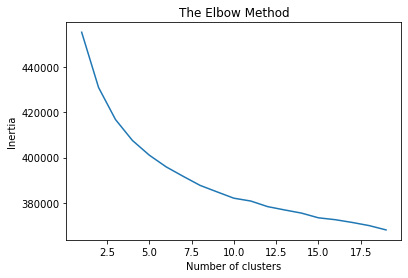

In [44]:
inertia = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(gene_sc)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,20), inertia)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 6)
gene_cluster = kmeans.fit(gene_sc)

In [46]:
gene_cluster

KMeans(n_clusters=6)

In [47]:
gene_cluster.cluster_centers_

array([[3.36739574e-01, 2.11716728e-01, 1.69741678e-01, ...,
        8.67361738e-18, 5.68181818e-03, 3.46944695e-18],
       [2.34588133e-01, 2.37640948e-01, 1.62435700e-01, ...,
        3.59712230e-03, 7.19424460e-03, 8.67361738e-18],
       [2.31350422e-01, 3.50121864e-01, 1.59566392e-01, ...,
        3.76344086e-02, 1.07526882e-02, 3.46944695e-18],
       [3.18463445e-01, 3.73496159e-01, 2.44570557e-01, ...,
        2.96735905e-03, 1.18694362e-02, 1.48367953e-02],
       [2.34387524e-01, 2.92158958e-01, 3.12420787e-01, ...,
        6.43086817e-03, 6.43086817e-03, 3.53697749e-02],
       [3.41352791e-01, 3.91350980e-01, 1.65845631e-01, ...,
        8.13008130e-03, 8.13008130e-03, 3.46944695e-18]])

In [48]:
gene_mat["Cluster"] = gene_cluster.fit_predict(gene_sc)

In [49]:
gene_mat.head()

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
MB-0362,-0.5390,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,1.3792,...,0,0,0,0,0,0,0,0,0,1
MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,1.0669,...,0,0,1,0,0,0,0,0,0,4
MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.1960,-0.2159,-1.0710,-1.4190,0.3337,...,1,0,0,0,0,0,0,0,0,1
MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.3830,-1.1789,0.8600,0.2752,...,0,0,0,0,0,0,0,0,0,5
MB-0503,-0.7617,-0.1360,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,1.1501,...,1,0,0,0,0,0,0,0,0,1


In [50]:
gene_mat.Cluster.value_counts()

5    385
1    340
2    308
4    261
0    174
3    129
Name: Cluster, dtype: int64

In [51]:
gene_cluster.inertia_

395871.892331747

In [52]:
cl_1 = gene_mat.loc[gene_mat.Cluster == 0]
cl1_d= cl_1.describe()
cl1_d


,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,Cluster
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.00000,174.000000,174.000000,174.000000,...,174.0,174.000000,174.000000,174.000000,174.000000,174.000000,174.0,174.000000,174.0,174.0
mean,0.287829,-0.907985,-0.304841,-1.114052,-0.047215,-0.017448,1.37665,-0.163610,-0.072914,-0.257270,...,0.0,0.965517,0.022989,0.028736,0.051724,0.017241,0.0,0.005747,0.0,0.0
std,1.094550,0.749455,0.843912,0.915899,0.969598,0.967952,1.62707,0.859785,1.034908,0.998922,...,0.0,0.182992,0.150299,0.167545,0.222109,0.130545,0.0,0.075810,0.0,0.0
min,-1.773200,-2.407100,-1.124500,-3.530800,-2.991300,-1.906400,-0.83880,-1.434500,-3.068100,-1.989600,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,-0.609100,-1.412725,-0.834475,-1.715025,-0.626300,-0.699450,0.16715,-0.764000,-0.709550,-0.909650,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
50%,0.112250,-0.926650,-0.582900,-1.180200,-0.108750,-0.095200,0.96670,-0.360300,-0.106400,-0.414450,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
75%,1.020600,-0.534850,-0.003050,-0.548675,0.574025,0.515200,2.20460,0.184300,0.459100,0.271850,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
max,3.931500,3.122700,5.291200,1.759200,3.377500,4.459900,8.27230,2.919100,3.467100,6.144200,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0


In [53]:
CL1 = cl_1[["DOD", "NPI", "TP53","ERBB2","PPP2R2A", "MTAP", "MAP2K4", "THREEGENE_ER-/HER2-"]].describe()
CL1

,DOD,NPI,TP53,ERBB2,PPP2R2A,MTAP,MAP2K4,THREEGENE_ER-/HER2-
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,0.304598,4.589931,0.186998,-0.764205,-0.871811,1.306776,-1.029680,0.965517
std,0.461565,0.780504,1.646201,1.393126,1.224385,1.901278,0.553854,0.182992
min,0.000000,3.012000,-2.807300,-5.249300,-3.633600,-3.789000,-3.158100,0.000000
25%,0.000000,4.040000,-1.247550,-1.643625,-1.723900,0.172500,-1.372650,1.000000
50%,0.000000,4.091000,0.323050,-0.906000,-0.889500,1.546800,-1.071550,1.000000
75%,1.000000,5.059000,1.495725,-0.139350,-0.189125,2.574525,-0.660650,1.000000
max,1.000000,6.198000,4.264400,5.129300,3.172400,5.828400,0.546500,1.000000


In [54]:
cl_2 = gene_mat.loc[gene_mat.Cluster == 1]
cl2_d= cl_2.describe()
cl2_d

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,Cluster
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.0
mean,0.143970,0.252103,0.217532,0.422533,-0.032021,-0.265554,-0.237147,-0.077247,0.011774,-0.151058,...,0.752941,0.008824,0.023529,0.129412,0.002941,0.208824,0.002941,0.011765,0.014706,1.0
std,0.897335,0.889499,1.004439,0.851106,0.874325,0.815335,0.535308,0.959404,0.997841,0.835943,...,0.431937,0.093656,0.151801,0.336150,0.054233,0.407067,0.054233,0.107984,0.120550,0.0
min,-1.631000,-1.651500,-1.409300,-1.913300,-2.412800,-2.168100,-1.087300,-1.634000,-3.016500,-1.864500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,-0.544975,-0.393375,-0.579150,-0.150550,-0.588650,-0.885475,-0.558025,-0.690725,-0.616150,-0.712600,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.074900,0.177050,-0.059100,0.446900,-0.030750,-0.282250,-0.334850,-0.282250,0.033250,-0.220000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.685625,0.709650,0.824575,0.978900,0.552225,0.209500,-0.056250,0.317450,0.723300,0.342600,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,3.185300,4.653900,3.966600,3.759400,2.640200,4.097000,2.737500,5.526400,2.423700,3.592500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [55]:
CL2= cl_2[["DOD", "NPI", "TP53","ERBB2","PPP2R2A", "MTAP", "MAP2K4", "THREEGENE_ER-/HER2-"]].describe()
CL2

,DOD,NPI,TP53,ERBB2,PPP2R2A,MTAP,MAP2K4,THREEGENE_ER-/HER2-
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.276471,3.563993,-0.056018,0.451154,0.229928,-0.198047,-0.168493,0.008824
std,0.447911,1.052979,0.841333,1.022563,1.006771,0.746670,1.092891,0.093656
min,0.000000,1.020000,-2.315300,-3.066800,-3.122200,-3.536500,-3.288700,0.000000
25%,0.000000,3.030750,-0.658250,-0.075350,-0.427550,-0.692075,-0.886150,0.000000
50%,0.000000,3.060000,-0.081150,0.367150,0.298450,-0.208550,-0.264900,0.000000
75%,1.000000,4.060000,0.512500,0.767525,0.954925,0.261125,0.480625,0.000000
max,1.000000,6.130000,2.549800,5.131300,2.922100,2.911300,3.555800,1.000000


In [56]:
cl_3 = gene_mat.loc[gene_mat.Cluster == 2]
cl3_d= cl_3.describe()
cl3_d

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,Cluster
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,...,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.0
mean,-0.363884,-0.331658,0.614180,0.144688,-0.187209,-0.023863,-0.319999,0.419228,-0.047904,0.332315,...,0.711039,0.074675,0.045455,0.120130,0.006494,0.142857,0.006494,0.006494,0.035714,2.0
std,0.724963,0.692233,1.183018,0.810562,0.737380,1.051675,0.455745,0.908926,0.877272,0.895539,...,0.454017,0.263295,0.208638,0.325642,0.080451,0.350497,0.080451,0.080451,0.185879,0.0
min,-1.670300,-1.993200,-1.133100,-2.917600,-2.159100,-2.203900,-1.298500,-1.626800,-2.351400,-1.821000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,-0.842325,-0.771775,-0.339925,-0.354150,-0.670850,-0.783425,-0.553850,-0.289300,-0.599550,-0.310625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,-0.519000,-0.384750,0.397800,0.126500,-0.188750,-0.189150,-0.398950,0.313250,-0.052950,0.349300,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,0.032350,0.012350,1.469375,0.652800,0.268425,0.494025,-0.177625,0.936400,0.516825,0.975725,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
max,3.018900,2.771400,3.788000,2.615200,2.811600,4.817000,3.770100,3.679800,2.813800,2.531500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [57]:
CL3 = cl_3[["DOD", "NPI", "TP53","ERBB2","PPP2R2A", "MTAP", "MAP2K4", "THREEGENE_ER-/HER2-"]].describe()
CL3

,DOD,NPI,TP53,ERBB2,PPP2R2A,MTAP,MAP2K4,THREEGENE_ER-/HER2-
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,0.237013,3.722795,-0.441740,-0.034418,-0.592600,-0.438537,-0.526353,0.074675
std,0.425942,1.153887,0.711725,1.191912,0.980741,0.630765,0.828233,0.263295
min,0.000000,1.020000,-2.360600,-3.293500,-2.916300,-2.245900,-2.438800,0.000000
25%,0.000000,3.030000,-0.864225,-0.687750,-1.252175,-0.816525,-1.070025,0.000000
50%,0.000000,4.032000,-0.433150,-0.161450,-0.608500,-0.480850,-0.562400,0.000000
75%,0.000000,4.100000,0.072575,0.322600,0.108525,-0.047825,-0.096775,0.000000
max,1.000000,6.300000,1.543700,5.171200,2.204600,1.365700,2.801500,1.000000


In [58]:
cl_4 = gene_mat.loc[gene_mat.Cluster == 3]
cl4_d= cl_4.describe()
cl4_d

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,Cluster
count,129.000000,129.000000,129.000000,129.000000,129.00000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.000000,129.000000,129.0,129.0
mean,0.312178,0.338295,-0.314257,-1.023199,0.41972,0.569255,0.331945,-0.332010,0.191999,-1.204652,...,0.286822,0.046512,0.162791,0.085271,0.0,0.077519,0.007752,0.007752,0.0,3.0
std,1.191650,1.117089,0.650629,1.184781,1.18291,0.895089,1.446546,0.798811,1.196625,0.467643,...,0.454041,0.211411,0.370614,0.280374,0.0,0.268456,0.088045,0.088045,0.0,0.0
min,-1.488600,-1.377200,-1.144600,-4.775400,-1.74230,-1.939300,-1.245700,-1.754000,-2.435600,-2.225300,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,3.0
25%,-0.516500,-0.412000,-0.784300,-1.671700,-0.41220,0.016400,-0.495000,-0.894500,-0.667300,-1.487600,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,3.0
50%,-0.012000,0.034300,-0.532600,-0.974900,0.30820,0.552600,-0.251600,-0.575200,0.266500,-1.199100,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,3.0
75%,0.919200,0.935800,-0.008100,-0.274000,1.17840,1.070300,0.628700,0.098700,0.974500,-0.897800,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,3.0
max,4.361400,4.244000,1.893500,1.578400,6.02200,3.311100,5.874900,2.895600,3.758700,0.108100,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,3.0


In [59]:
CL4 = cl_4[["DOD", "NPI", "TP53","ERBB2","PPP2R2A", "MTAP", "MAP2K4", "THREEGENE_ER-/HER2-"]].describe()
CL4

,DOD,NPI,TP53,ERBB2,PPP2R2A,MTAP,MAP2K4,THREEGENE_ER-/HER2-
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.379845,3.941975,-0.627033,1.494521,-0.343398,-0.012332,-0.629564,0.046512
std,0.487240,1.033524,0.976599,1.725010,1.450139,1.123523,0.990110,0.211411
min,0.000000,1.040000,-2.870800,-1.482200,-4.137200,-2.941400,-3.309900,0.000000
25%,0.000000,3.060000,-1.304400,0.426300,-1.421500,-0.685100,-1.257400,0.000000
50%,0.000000,4.040000,-0.704500,1.091500,-0.298600,-0.086700,-0.807900,0.000000
75%,1.000000,4.120000,0.011500,2.023300,0.606600,0.771500,-0.114300,0.000000
max,1.000000,6.240000,1.620200,5.534000,4.392200,3.597500,2.135800,1.000000


In [60]:
cl_5 = gene_mat.loc[gene_mat.Cluster == 4]
cl5_d= cl_5.describe()
cl5_d

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,Cluster
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,...,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.0,261.0
mean,-0.331325,-0.745193,-0.254728,-0.519575,-0.023054,0.385988,0.379854,-0.090289,-0.005804,-0.044841,...,0.038314,0.249042,0.417625,0.045977,0.026820,0.042146,0.003831,0.007663,0.0,4.0
std,0.781702,0.546651,0.849716,0.948400,0.821922,1.018459,1.197192,0.896620,1.042503,0.841884,...,0.192322,0.433289,0.494115,0.209838,0.161867,0.201307,0.061898,0.087369,0.0,0.0
min,-1.646500,-1.961700,-1.188800,-2.977000,-2.731700,-1.544700,-0.926000,-1.522300,-3.157900,-2.308300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.0
25%,-0.931400,-1.096400,-0.804300,-1.234300,-0.553300,-0.350100,-0.370200,-0.686800,-0.576700,-0.654600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.0
50%,-0.496500,-0.814000,-0.590200,-0.498800,-0.064600,0.232700,-0.049500,-0.272700,0.004600,-0.167800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.0
75%,0.195600,-0.369100,0.104900,0.106600,0.529600,0.912700,0.787200,0.285800,0.549200,0.554900,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.0
max,2.421100,1.604100,3.778100,2.899800,2.278900,5.899300,9.593000,4.513400,3.862800,1.872900,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,4.0


In [61]:
CL5 = cl_5[["DOD", "NPI", "TP53","ERBB2","PPP2R2A", "MTAP", "MAP2K4", "THREEGENE_ER-/HER2-"]].describe()
CL5

,DOD,NPI,TP53,ERBB2,PPP2R2A,MTAP,MAP2K4,THREEGENE_ER-/HER2-
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,0.505747,4.725174,-0.368266,1.843893,-1.318823,-0.179367,-1.063356,0.249042
std,0.500928,1.029973,1.018697,2.520406,1.147773,0.970063,0.560714,0.433289
min,0.000000,2.024000,-2.734200,-4.866400,-4.346400,-2.521400,-3.084200,0.000000
25%,0.000000,4.036000,-1.200900,-0.461000,-2.148400,-0.798600,-1.333200,0.000000
50%,1.000000,5.036000,-0.327300,2.060600,-1.300700,-0.275600,-1.014400,0.000000
75%,1.000000,6.020000,0.357000,4.299300,-0.561300,0.386800,-0.729000,0.000000
max,1.000000,6.320000,2.166300,5.299800,1.624200,3.384700,0.606300,1.000000


In [62]:
cl_6 = gene_mat.loc[gene_mat.Cluster == 5]
cl6_d= cl_6.describe()
cl6_d

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,Cluster
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.00000,385.0,385.0
mean,-0.401285,0.001581,-0.373198,0.085184,0.073635,0.041940,-0.279925,-0.311065,0.002192,0.244353,...,0.155844,0.002597,0.046753,0.044156,0.002597,0.111688,0.036364,0.01039,0.0,5.0
std,0.870267,0.982743,0.670243,0.968111,1.162735,0.937588,0.589477,1.067939,1.025308,0.987983,...,0.363180,0.050965,0.211385,0.205709,0.050965,0.315392,0.187437,0.10153,0.0,0.0
min,-1.804700,-2.154200,-1.433400,-2.962300,-2.212500,-2.151300,-1.128200,-1.564100,-2.914100,-1.867600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,5.0
25%,-1.047800,-0.685500,-0.852400,-0.536900,-0.600600,-0.641800,-0.578700,-0.934800,-0.678900,-0.532400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,5.0
50%,-0.592600,-0.107200,-0.622300,0.069100,0.078000,-0.053300,-0.407300,-0.558300,0.015300,0.156200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,5.0
75%,0.029100,0.588400,-0.085400,0.648600,0.649000,0.702100,-0.155600,-0.025200,0.695100,0.948700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,5.0
max,3.455100,3.903100,2.278100,3.824500,14.117200,3.119300,5.311200,6.399100,2.688700,3.315700,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,5.0


In [63]:
CL6 = cl_6[["DOD", "NPI", "TP53","ERBB2","PPP2R2A", "MTAP", "MAP2K4", "THREEGENE_ER-/HER2-"]].describe()
CL6

,DOD,NPI,TP53,ERBB2,PPP2R2A,MTAP,MAP2K4,THREEGENE_ER-/HER2-
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,0.306494,4.074825,-0.122921,0.286732,-0.728764,-0.432285,-0.216191,0.002597
std,0.461637,1.103594,1.014948,1.367755,1.523181,0.983312,1.149724,0.050965
min,0.000000,1.022000,-2.618000,-4.537200,-6.945800,-3.945300,-3.665400,0.000000
25%,0.000000,3.050000,-0.778900,-0.438600,-1.716800,-1.030800,-0.942000,0.000000
50%,0.000000,4.046000,-0.124600,0.198800,-0.783600,-0.416400,-0.293700,0.000000
75%,1.000000,5.050000,0.547400,0.808200,0.221600,0.240400,0.418200,0.000000
max,1.000000,6.360000,4.116200,5.437200,3.384200,2.766000,3.289800,1.000000


In [64]:
C1 = CL1.iloc[1]
C2 = CL2.iloc[1]
C3 = CL3.iloc[1]
C4 = CL4.iloc[1]
C5 = CL5.iloc[1]
C6 = CL6.iloc[1]

In [65]:
frame = { "CL-1": CL1.iloc[1], "CL-2": CL2.iloc[1], "CL-3": CL3.iloc[1], "CL-4": CL4.iloc[1], "CL-5": CL5.iloc[1], "CL-6": CL6.iloc[1], } 

In [66]:
df_cl = pd.DataFrame(frame) 

In [67]:
df_cl

,CL-1,CL-2,CL-3,CL-4,CL-5,CL-6
DOD,0.304598,0.276471,0.237013,0.379845,0.505747,0.306494
NPI,4.589931,3.563993,3.722795,3.941975,4.725174,4.074825
TP53,0.186998,-0.056018,-0.441740,-0.627033,-0.368266,-0.122921
ERBB2,-0.764205,0.451154,-0.034418,1.494521,1.843893,0.286732
PPP2R2A,-0.871811,0.229928,-0.592600,-0.343398,-1.318823,-0.728764
MTAP,1.306776,-0.198047,-0.438537,-0.012332,-0.179367,-0.432285
MAP2K4,-1.029680,-0.168493,-0.526353,-0.629564,-1.063356,-0.216191
THREEGENE_ER-/HER2-,0.965517,0.008824,0.074675,0.046512,0.249042,0.002597


In [68]:
df_cl_t = df_cl.T
df_cl_t

,DOD,NPI,TP53,ERBB2,PPP2R2A,MTAP,MAP2K4,THREEGENE_ER-/HER2-
CL-1,0.304598,4.589931,0.186998,-0.764205,-0.871811,1.306776,-1.029680,0.965517
CL-2,0.276471,3.563993,-0.056018,0.451154,0.229928,-0.198047,-0.168493,0.008824
CL-3,0.237013,3.722795,-0.441740,-0.034418,-0.592600,-0.438537,-0.526353,0.074675
CL-4,0.379845,3.941975,-0.627033,1.494521,-0.343398,-0.012332,-0.629564,0.046512
CL-5,0.505747,4.725174,-0.368266,1.843893,-1.318823,-0.179367,-1.063356,0.249042
CL-6,0.306494,4.074825,-0.122921,0.286732,-0.728764,-0.432285,-0.216191,0.002597


## Cluster summary: DOD

In [69]:
percent = pd.DataFrame(df_cl_t["DOD"])

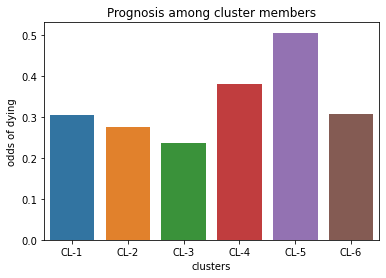

In [70]:
sns.barplot(data = percent.reset_index(), x = 'index', y = 'DOD')
plt.xlabel("clusters")
plt.ylabel("odds of dying")
plt.title("Prognosis among cluster members")
plt.show()

## Cluster structure

In [71]:
from sklearn import preprocessing

x = df_cl_t.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cl_scaled1 = pd.DataFrame(x_scaled)

In [72]:
df_cl_scaled1


,0,1,2,3,4,5,6,7
0,0.251493,0.883530,1.000000,0.000000,0.288627,1.000000,0.037633,1.000000
1,0.146828,0.000000,0.701466,0.465994,1.000000,0.137792,1.000000,0.006466
2,0.000000,0.136759,0.227623,0.279816,0.468909,0.000000,0.600095,0.074854
3,0.531499,0.325515,0.000000,0.866043,0.629814,0.244200,0.484757,0.045605
4,1.000000,1.000000,0.317883,1.000000,0.000000,0.148495,0.000000,0.255935
5,0.258547,0.439925,0.619279,0.402951,0.380990,0.003583,0.946698,0.000000


In [84]:
df_t = df_cl_scaled1.T
df_t

,0,1,2,3,4,5
0,0.251493,0.146828,0.000000,0.531499,1.000000,0.258547
1,0.883530,0.000000,0.136759,0.325515,1.000000,0.439925
2,1.000000,0.701466,0.227623,0.000000,0.317883,0.619279
3,0.000000,0.465994,0.279816,0.866043,1.000000,0.402951
4,0.288627,1.000000,0.468909,0.629814,0.000000,0.380990
5,1.000000,0.137792,0.000000,0.244200,0.148495,0.003583
6,0.037633,1.000000,0.600095,0.484757,0.000000,0.946698
7,1.000000,0.006466,0.074854,0.045605,0.255935,0.000000


In [85]:
df_t["parameters"] = df_cl.index

In [86]:
df_t

,0,1,2,3,4,5,parameters
0,0.251493,0.146828,0.000000,0.531499,1.000000,0.258547,DOD
1,0.883530,0.000000,0.136759,0.325515,1.000000,0.439925,NPI
2,1.000000,0.701466,0.227623,0.000000,0.317883,0.619279,TP53
3,0.000000,0.465994,0.279816,0.866043,1.000000,0.402951,ERBB2
4,0.288627,1.000000,0.468909,0.629814,0.000000,0.380990,PPP2R2A
5,1.000000,0.137792,0.000000,0.244200,0.148495,0.003583,MTAP
6,0.037633,1.000000,0.600095,0.484757,0.000000,0.946698,MAP2K4
7,1.000000,0.006466,0.074854,0.045605,0.255935,0.000000,THREEGENE_ER-/HER2-


In [87]:
df_t = df_t.rename(columns = {0: "CL-1", 1: "CL-2", 2: "CL-3 best prognosis", 
                              3: "CL-4", 4: "CL-5 worst prognosis", 5: "CL-6"})

In [88]:
df_t

,CL-1,CL-2,CL-3 best prognosis,CL-4,CL-5 worst prognosis,CL-6,parameters
0,0.251493,0.146828,0.000000,0.531499,1.000000,0.258547,DOD
1,0.883530,0.000000,0.136759,0.325515,1.000000,0.439925,NPI
2,1.000000,0.701466,0.227623,0.000000,0.317883,0.619279,TP53
3,0.000000,0.465994,0.279816,0.866043,1.000000,0.402951,ERBB2
4,0.288627,1.000000,0.468909,0.629814,0.000000,0.380990,PPP2R2A
5,1.000000,0.137792,0.000000,0.244200,0.148495,0.003583,MTAP
6,0.037633,1.000000,0.600095,0.484757,0.000000,0.946698,MAP2K4
7,1.000000,0.006466,0.074854,0.045605,0.255935,0.000000,THREEGENE_ER-/HER2-


Text(0.5, 1.0, 'Structure of clusters')

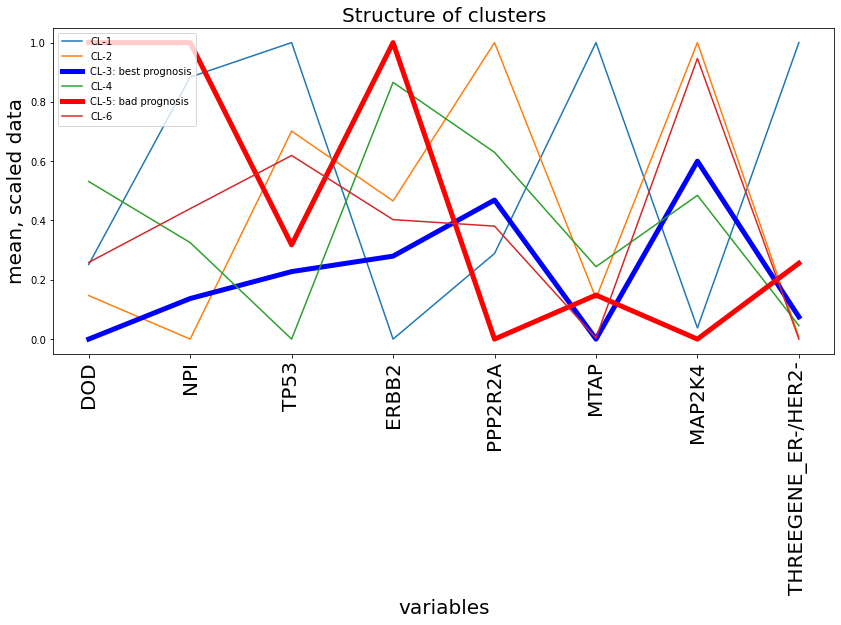

In [89]:
plt.figure(figsize =(14,6))
sns.lineplot(data=df_t, x="parameters", y="CL-1", legend='brief', label=str("CL-1"))
sns.lineplot(data=df_t, x="parameters", y="CL-2", legend='brief', label=str("CL-2"))
sns.lineplot(data=df_t, x="parameters", y="CL-3 best prognosis", linewidth=5, color = "blue", legend='brief', label=str("CL-3: best prognosis"))
sns.lineplot(data=df_t, x="parameters", y="CL-4", legend='brief', label=str("CL-4"))
sns.lineplot(data=df_t, x="parameters", y="CL-5 worst prognosis", linewidth=5, color = "red", legend='brief', label=str("CL-5: bad prognosis"))
sns.lineplot(data=df_t, x="parameters", y="CL-6", legend='brief', label=str("CL-6"))


plt.xticks(fontsize=20, rotation=90)
plt.xlabel("variables", fontsize=20)
plt.ylabel("mean, scaled data", fontsize=20)
plt.title("Structure of clusters", fontsize = 20)


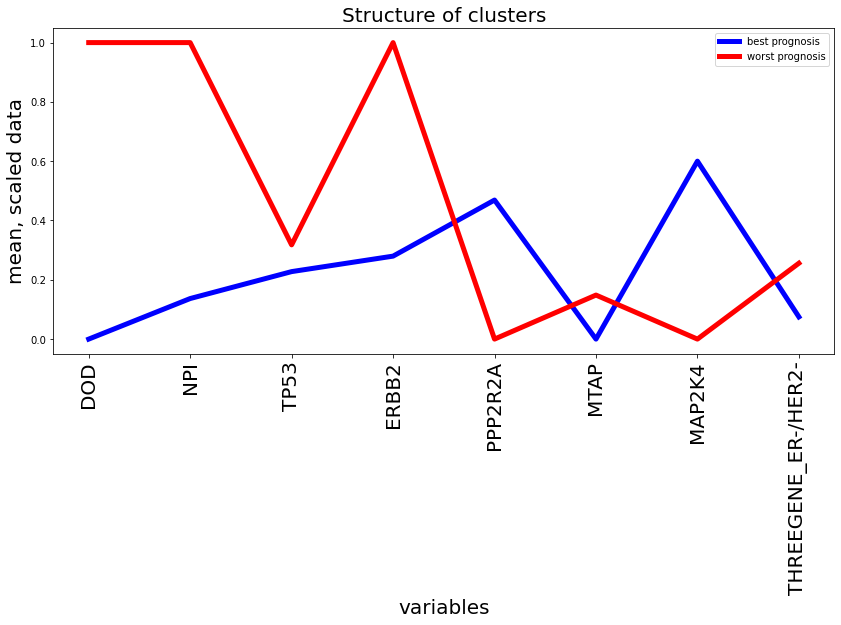

In [90]:
plt.figure(figsize =(14,6))
# sns.lineplot(data=df_t, x="parameters", y="CL-1", legend='brief', label=str("CL-1"))
# sns.lineplot(data=df_t, x="parameters", y="CL-2", legend='brief', label=str("CL-2"))
sns.lineplot(data=df_t, x="parameters", y="CL-3 best prognosis", linewidth=5, color = "blue", legend='brief', label=str("best prognosis"))
#sns.lineplot(data=df_t, x="parameters", y="CL-4", linewidth=5, color = "red",  legend='brief', label=str("worst prognosis"))
sns.lineplot(data=df_t, x="parameters", y="CL-5 worst prognosis", linewidth=5, color = "red", legend='brief', label=str("worst prognosis"))
# sns.lineplot(data=df_t, x="parameters", y="CL-6 intermediate prognosis", legend='brief', label=str("CL-6: intermediate prognosis"))

plt.legend(loc='upper right')
plt.xticks(fontsize=20, rotation=90)
plt.xlabel("variables", fontsize=20)
plt.ylabel("mean, scaled data", fontsize=20)
plt.title("Structure of clusters", fontsize = 20)
plt.show()

In [91]:
cl_4["DOD"]

ID
MB-4618    0
MB-4665    0
MB-4691    1
MB-4671    1
MB-4667    0
          ..
MB-6208    0
MB-6312    0
MB-0147    1
MB-5593    1
MB-5636    0
Name: DOD, Length: 129, dtype: int64

### T-tests

In [92]:
import scipy
import scipy.stats as stats

In [93]:
from scipy.stats import ttest_ind

In [94]:
# if Shapiro-Wilks test significant, we can not run t-test and we shall run non-parametric statistic,
# such as Mann-Whitney t-test

In [100]:
shapiro_test = stats.shapiro(cl_3["NPI"])
shapiro_test

ShapiroResult(statistic=0.9394100308418274, pvalue=6.528275697803565e-10)

In [101]:
shapiro_test = stats.shapiro(cl_3["ERBB2"])
shapiro_test

ShapiroResult(statistic=0.8427550196647644, pvalue=4.860893120698875e-17)

In [102]:
shapiro_test = stats.shapiro(cl_3["MAP2K4"])
shapiro_test

ShapiroResult(statistic=0.9737564325332642, pvalue=2.0642028175643645e-05)

In [103]:
mannwhitney = stats.mannwhitneyu(cl_3["ERBB2"],cl_5["ERBB2"])
mannwhitney

MannwhitneyuResult(statistic=24474.5, pvalue=4.340593838038744e-16)

In [104]:
mannwhitney = stats.mannwhitneyu(cl_3["NPI"],cl_5["NPI"])
mannwhitney

MannwhitneyuResult(statistic=22037.0, pvalue=7.502464146678866e-21)

In [105]:
mannwhitney = stats.mannwhitneyu(cl_3["MAP2K4"],cl_5["MAP2K4"])
mannwhitney

MannwhitneyuResult(statistic=24161.5, pvalue=1.1589953256839802e-16)

In [ ]:
# the difference between cluster with worst and best prognosis in NPI, ERBB2 and MAP2K4 is stat significant

In [106]:
data = [cl_3["ERBB2"],cl_5["ERBB2"]] 

<ipython-input-108-402bd242de2c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


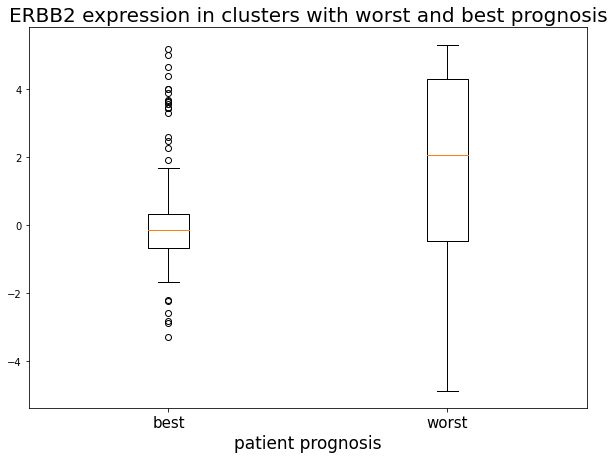

In [108]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
ax = fig.add_subplot(111) 
ax.set_xticklabels(["best", "worst"], fontsize=15) 

plt.xlabel("patient prognosis", fontsize = 17)
plt.title("ERBB2 expression in clusters with worst and best prognosis", fontsize = 20)

plt.show()

# PCA

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
res = pca.fit_transform(gene_sc)

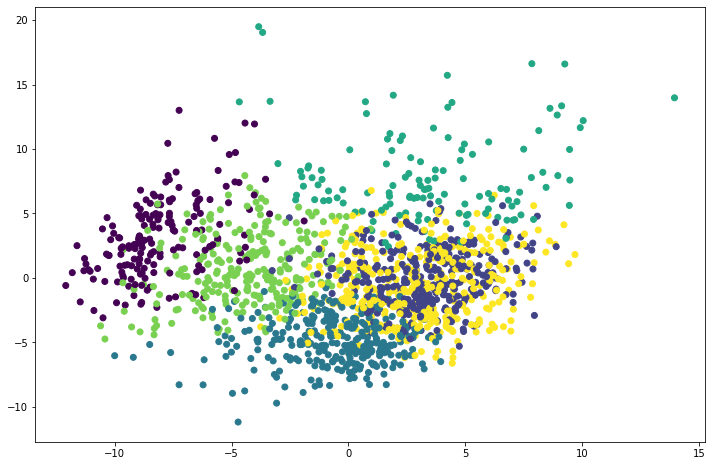

In [110]:
plt.figure(figsize=(12,8))
plt.scatter(x = res[:,0], y = res[:,1], c = kmeans.labels_, cmap = "viridis")
plt.show()

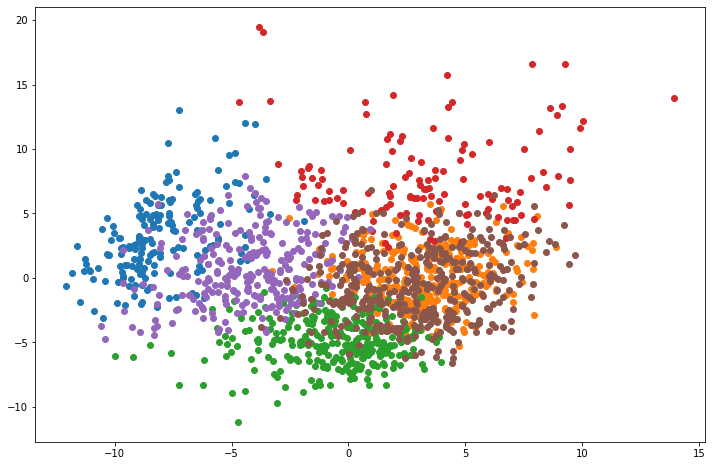

In [111]:
plt.figure(figsize=(12,8))
plt.scatter(x = res[gene_mat.Cluster==0 ,0], y = res[gene_mat.Cluster==0, 1], cmap = "viridis")
plt.scatter(x = res[gene_mat.Cluster==1 ,0], y = res[gene_mat.Cluster==1, 1], cmap = "viridis")
plt.scatter(x = res[gene_mat.Cluster==2 ,0], y = res[gene_mat.Cluster==2, 1], cmap = "viridis")
plt.scatter(x = res[gene_mat.Cluster==3 ,0], y = res[gene_mat.Cluster==3, 1], cmap = "viridis")
plt.scatter(x = res[gene_mat.Cluster==4 ,0], y = res[gene_mat.Cluster==4, 1], cmap = "viridis")
plt.scatter(x = res[gene_mat.Cluster==5 ,0], y = res[gene_mat.Cluster==5, 1], cmap = "viridis")


plt.show()

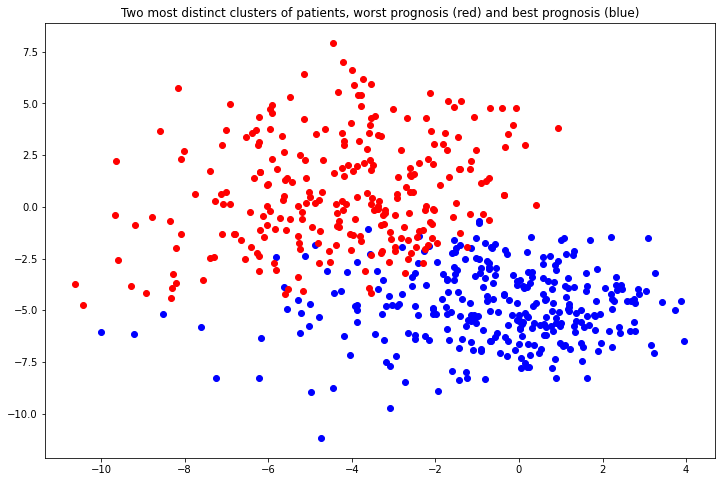

In [113]:
plt.figure(figsize=(12,8))
#plt.scatter(x = res[gene_mat.Cluster==0 ,0], y = res[gene_mat.Cluster==0, 1], cmap = "viridis")
#plt.scatter(x = res[gene_mat.Cluster==1 ,0], y = res[gene_mat.Cluster==1, 1], cmap = "viridis")
plt.scatter(x = res[gene_mat.Cluster==2 ,0], y = res[gene_mat.Cluster==2, 1], color = "blue")
#plt.scatter(x = res[gene_mat.Cluster==3 ,0], y = res[gene_mat.Cluster==3, 1], color = "red")
plt.scatter(x = res[gene_mat.Cluster==4 ,0], y = res[gene_mat.Cluster==4, 1], color = "red")
#plt.scatter(x = res[gene_mat.Cluster==5 ,0], y = res[gene_mat.Cluster==5, 1], cmap = "viridis")
plt.title("Two most distinct clusters of patients, worst prognosis (red) and best prognosis (blue)")

plt.show()

# Dendrogram

In [86]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc 

In [104]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(gene_sc) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [105]:
X_principal

,P1,P2
0,3.444295,-1.290563
1,-1.705345,5.096762
2,-0.312211,-1.758825
3,4.074279,-0.278723
4,2.277626,-2.476960
...,...,...
1592,4.957743,-1.154343
1593,-7.674221,-1.579254
1594,-1.559274,-1.617570
1595,-0.275828,-2.275403


In [106]:
gene_mat.head()

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
MB-0362,-0.5390,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,1.3792,...,0,0,0,0,0,0,0,0,0,5
MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,1.0669,...,0,0,1,0,0,0,0,0,0,3
MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.1960,-0.2159,-1.0710,-1.4190,0.3337,...,1,0,0,0,0,0,0,0,0,5
MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.3830,-1.1789,0.8600,0.2752,...,0,0,0,0,0,0,0,0,0,2
MB-0503,-0.7617,-0.1360,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,1.1501,...,1,0,0,0,0,0,0,0,0,5


In [117]:
len(ID)

1597

In [121]:
labellist = list(gene_mat.index)

In [122]:
type(labellist)

list

In [123]:
labellist

['MB-0362',
 'MB-0346',
 'MB-0386',
 'MB-0574',
 'MB-0503',
 'MB-0641',
 'MB-0201',
 'MB-0218',
 'MB-0316',
 'MB-0189',
 'MB-0891',
 'MB-0658',
 'MB-0899',
 'MB-0605',
 'MB-0258',
 'MB-0506',
 'MB-0420',
 'MB-0223',
 'MB-0445',
 'MB-0199',
 'MB-0517',
 'MB-0155',
 'MB-0428',
 'MB-0117',
 'MB-0906',
 'MB-0249',
 'MB-0660',
 'MB-0497',
 'MB-0434',
 'MB-0143',
 'MB-0513',
 'MB-0541',
 'MB-0653',
 'MB-0455',
 'MB-0540',
 'MB-0384',
 'MB-0637',
 'MB-0157',
 'MB-0443',
 'MB-0584',
 'MB-0292',
 'MB-0322',
 'MB-0501',
 'MB-0401',
 'MB-0140',
 'MB-0606',
 'MB-0666',
 'MB-0598',
 'MB-0453',
 'MB-0138',
 'MB-0579',
 'MB-0471',
 'MB-0619',
 'MB-0171',
 'MB-0310',
 'MB-0621',
 'MB-0614',
 'MB-0372',
 'MB-0374',
 'MB-0382',
 'MB-0066',
 'MB-0144',
 'MB-0596',
 'MB-0164',
 'MB-0215',
 'MB-0146',
 'MB-0229',
 'MB-0505',
 'MB-0102',
 'MB-0569',
 'MB-0516',
 'MB-0272',
 'MB-0585',
 'MB-0494',
 'MB-0306',
 'MB-0463',
 'MB-0198',
 'MB-0203',
 'MB-0631',
 'MB-0363',
 'MB-0427',
 'MB-0519',
 'MB-0371',
 'MB

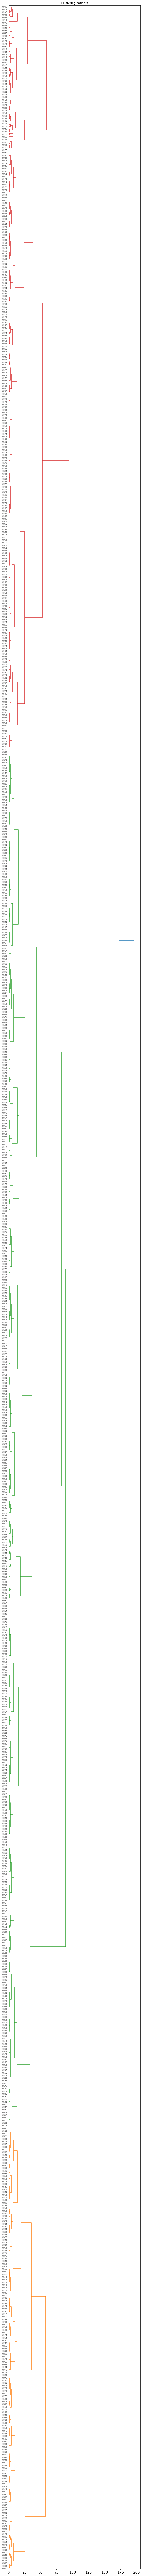

In [126]:
plt.figure(figsize =(10, 200)) 
plt.xticks(fontsize=15)

plt.title('Clustering patients') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')), labels = labellist, orientation= "right") 

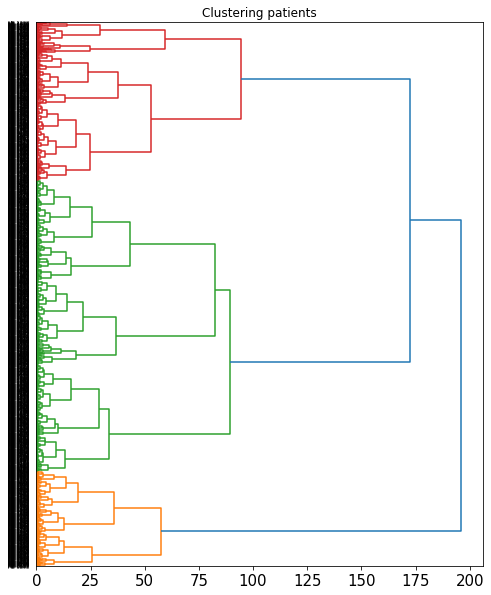

In [127]:
plt.figure(figsize =(8, 10)) 
plt.xticks(fontsize=15)

plt.title('Clustering patients') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')), labels = labellist, orientation= "right") 

In [128]:
gene_mat.head()

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
MB-0362,-0.5390,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,1.3792,...,0,0,0,0,0,0,0,0,0,5
MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,1.0669,...,0,0,1,0,0,0,0,0,0,3
MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.1960,-0.2159,-1.0710,-1.4190,0.3337,...,1,0,0,0,0,0,0,0,0,5
MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.3830,-1.1789,0.8600,0.2752,...,0,0,0,0,0,0,0,0,0,2
MB-0503,-0.7617,-0.1360,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,1.1501,...,1,0,0,0,0,0,0,0,0,5


In [151]:
df_dod = pd.DataFrame(gene_mat["DOD"])

In [152]:
type(df_dod)

pandas.core.frame.DataFrame

In [153]:
df_dod

,DOD
ID,
MB-0362,1
MB-0346,1
MB-0386,0
MB-0574,0
MB-0503,0
...,...
MB-5167,0
MB-5465,1
MB-5453,1


In [155]:
l1 = list(df_dod.index)

In [156]:
l1

['MB-0362',
 'MB-0346',
 'MB-0386',
 'MB-0574',
 'MB-0503',
 'MB-0641',
 'MB-0201',
 'MB-0218',
 'MB-0316',
 'MB-0189',
 'MB-0891',
 'MB-0658',
 'MB-0899',
 'MB-0605',
 'MB-0258',
 'MB-0506',
 'MB-0420',
 'MB-0223',
 'MB-0445',
 'MB-0199',
 'MB-0517',
 'MB-0155',
 'MB-0428',
 'MB-0117',
 'MB-0906',
 'MB-0249',
 'MB-0660',
 'MB-0497',
 'MB-0434',
 'MB-0143',
 'MB-0513',
 'MB-0541',
 'MB-0653',
 'MB-0455',
 'MB-0540',
 'MB-0384',
 'MB-0637',
 'MB-0157',
 'MB-0443',
 'MB-0584',
 'MB-0292',
 'MB-0322',
 'MB-0501',
 'MB-0401',
 'MB-0140',
 'MB-0606',
 'MB-0666',
 'MB-0598',
 'MB-0453',
 'MB-0138',
 'MB-0579',
 'MB-0471',
 'MB-0619',
 'MB-0171',
 'MB-0310',
 'MB-0621',
 'MB-0614',
 'MB-0372',
 'MB-0374',
 'MB-0382',
 'MB-0066',
 'MB-0144',
 'MB-0596',
 'MB-0164',
 'MB-0215',
 'MB-0146',
 'MB-0229',
 'MB-0505',
 'MB-0102',
 'MB-0569',
 'MB-0516',
 'MB-0272',
 'MB-0585',
 'MB-0494',
 'MB-0306',
 'MB-0463',
 'MB-0198',
 'MB-0203',
 'MB-0631',
 'MB-0363',
 'MB-0427',
 'MB-0519',
 'MB-0371',
 'MB

In [203]:
l2 = list(df_dod.DOD)

In [204]:
l2

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,


In [208]:
l2m = [str(i) for i in l2]

In [209]:
label_comp = list(zip(l2m, l1))

In [210]:
label_comp

[('1', 'MB-0362'),
 ('1', 'MB-0346'),
 ('0', 'MB-0386'),
 ('0', 'MB-0574'),
 ('0', 'MB-0503'),
 ('0', 'MB-0641'),
 ('0', 'MB-0201'),
 ('0', 'MB-0218'),
 ('0', 'MB-0316'),
 ('1', 'MB-0189'),
 ('0', 'MB-0891'),
 ('0', 'MB-0658'),
 ('0', 'MB-0899'),
 ('0', 'MB-0605'),
 ('0', 'MB-0258'),
 ('1', 'MB-0506'),
 ('0', 'MB-0420'),
 ('1', 'MB-0223'),
 ('0', 'MB-0445'),
 ('0', 'MB-0199'),
 ('0', 'MB-0517'),
 ('0', 'MB-0155'),
 ('0', 'MB-0428'),
 ('0', 'MB-0117'),
 ('0', 'MB-0906'),
 ('0', 'MB-0249'),
 ('1', 'MB-0660'),
 ('0', 'MB-0497'),
 ('1', 'MB-0434'),
 ('0', 'MB-0143'),
 ('0', 'MB-0513'),
 ('0', 'MB-0541'),
 ('1', 'MB-0653'),
 ('0', 'MB-0455'),
 ('0', 'MB-0540'),
 ('1', 'MB-0384'),
 ('0', 'MB-0637'),
 ('0', 'MB-0157'),
 ('0', 'MB-0443'),
 ('0', 'MB-0584'),
 ('0', 'MB-0292'),
 ('0', 'MB-0322'),
 ('0', 'MB-0501'),
 ('1', 'MB-0401'),
 ('0', 'MB-0140'),
 ('1', 'MB-0606'),
 ('1', 'MB-0666'),
 ('1', 'MB-0598'),
 ('1', 'MB-0453'),
 ('0', 'MB-0138'),
 ('0', 'MB-0579'),
 ('0', 'MB-0471'),
 ('0', 'MB-0

In [229]:
label_comp_m = [(item[0] + "  " + item[1]) for item in label_comp] 

In [230]:
label_comp_m

['1  MB-0362',
 '1  MB-0346',
 '0  MB-0386',
 '0  MB-0574',
 '0  MB-0503',
 '0  MB-0641',
 '0  MB-0201',
 '0  MB-0218',
 '0  MB-0316',
 '1  MB-0189',
 '0  MB-0891',
 '0  MB-0658',
 '0  MB-0899',
 '0  MB-0605',
 '0  MB-0258',
 '1  MB-0506',
 '0  MB-0420',
 '1  MB-0223',
 '0  MB-0445',
 '0  MB-0199',
 '0  MB-0517',
 '0  MB-0155',
 '0  MB-0428',
 '0  MB-0117',
 '0  MB-0906',
 '0  MB-0249',
 '1  MB-0660',
 '0  MB-0497',
 '1  MB-0434',
 '0  MB-0143',
 '0  MB-0513',
 '0  MB-0541',
 '1  MB-0653',
 '0  MB-0455',
 '0  MB-0540',
 '1  MB-0384',
 '0  MB-0637',
 '0  MB-0157',
 '0  MB-0443',
 '0  MB-0584',
 '0  MB-0292',
 '0  MB-0322',
 '0  MB-0501',
 '1  MB-0401',
 '0  MB-0140',
 '1  MB-0606',
 '1  MB-0666',
 '1  MB-0598',
 '1  MB-0453',
 '0  MB-0138',
 '0  MB-0579',
 '0  MB-0471',
 '0  MB-0619',
 '0  MB-0171',
 '0  MB-0310',
 '0  MB-0621',
 '0  MB-0614',
 '1  MB-0372',
 '0  MB-0374',
 '0  MB-0382',
 '0  MB-0066',
 '1  MB-0144',
 '0  MB-0596',
 '0  MB-0164',
 '0  MB-0215',
 '0  MB-0146',
 '0  MB-02

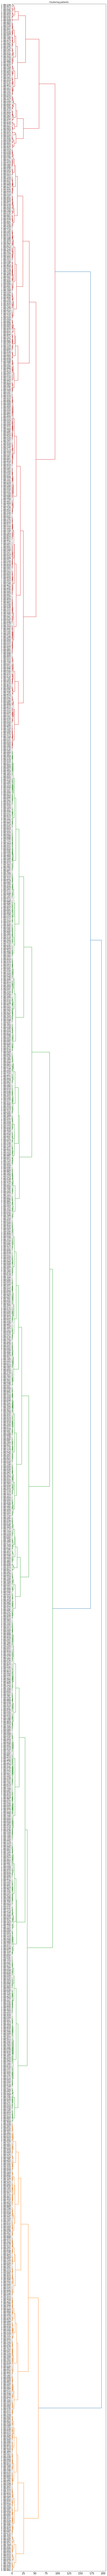

In [235]:
plt.figure(figsize =(10, 280)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Clustering patients') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')), labels = label_comp_m, leaf_font_size= 10, orientation= "right") 

In [238]:
Dendrogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [21.875, 21.875, 81.25, 81.25],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [122.5, 122.5, 152.5, 152.5],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [137.5, 137.5, 191.25, 191.25],
  [51.5625, 51.5625, 164.375, 164.375],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [240.0, 240.0, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [355.0, 355.0, 3

In [239]:
Dendrogram["color_list"]

['C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',